In [16]:
#advantage: 
#effective in high dimensinal spaces
#still effective in cases where number of dimensions is greater than number of samples
#use a subset of training points, so it's memory efficient
#versatile: different kernel functions can be specified

In [17]:
#disadvantage:
#if number of features is much more than samples, poor performances
#svms do not provide probability estimates, which are calcu by five-fold cross validation(expensive)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
from sklearn import datasets
iris=datasets.load_iris()
x=iris.data
y=iris.target


In [20]:
from sklearn.svm import SVC

In [21]:
model=SVC()

In [22]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [23]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
from sklearn import metrics
pred=model.predict(x_test)
print metrics.accuracy_score(y_test,pred)

1.0


In [25]:
#97.4% accuracy with support vector classification

In [26]:
#fit by various kernels

In [27]:
#LinearSVC() and SVC(kernel='linear'):
#LinearSVC minimizes squared hinge loss, SVC minimizes regular hinge loss
#LinearSVC uses one-vs-all multiclass reduction, SVC uses one-vs-one

In [29]:
from sklearn import svm

x=iris.data[:,:2]
y=iris.target

#svm regularization parameter
C=1.0

#svc with linear kernel
svc=svm.SVC(kernel='linear',C=C).fit(x,y)

#svc with radial kernel
svc_rbf=svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(x,y)

#svc with 3rd degree polynomial
svc_poly=svm.SVC(kernel='poly',degree=3,C=C).fit(x,y)

#svc linear
svc_lin=svm.LinearSVC(C=C).fit(x,y)


In [43]:
#define mesh plot
h=0.02

x_min=x[:,0].min()-1
x_max=x[:,0].max()+1

y_min=x[:,1].min()-1
y_max=x[:,1].max()+1

#note dimension of xx and yy
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))


In [31]:
titles=['SVC with linear kernel',
       'linearSVC',
       'SVC with RBF kernel',
       'SVC with 3rd degree polynomial kernel']

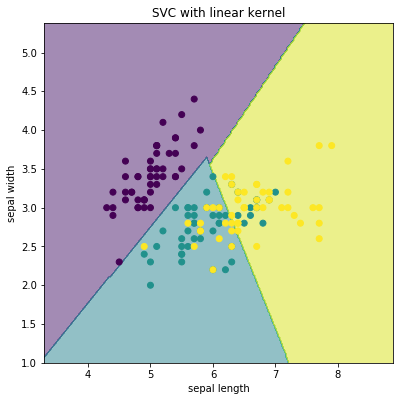

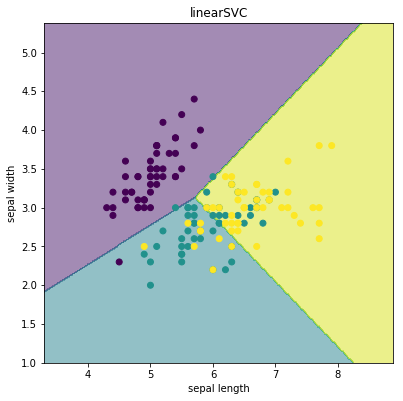

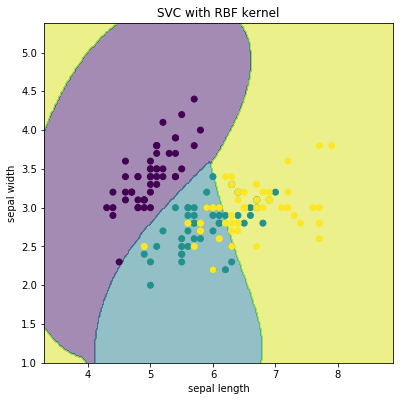

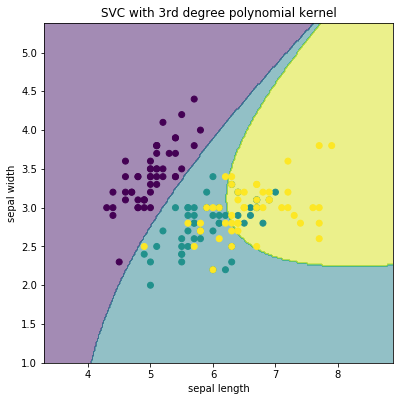

array([[3.3 , 1.  ],
       [3.32, 1.  ],
       [3.34, 1.  ],
       ...,
       [8.84, 5.38],
       [8.86, 5.38],
       [8.88, 5.38]])

In [65]:
for i,clf in enumerate((svc,svc_lin,svc_rbf,svc_poly)):
    plt.figure(figsize=(15,15))
    
    #size=2*2, position by i+1
    plt.subplot(2,2,i+1)
    #adjust spaceing of subplots
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    
    #predict
    #note flatten xx and yy
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    
    #contour plot
    plt.contourf(xx,yy,z,alpha=0.5,linewidths=0)
    
    #plot training points
    plt.scatter(x[:,0],x[:,1],c=y)
    
    #label
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title(titles[i])
plt.show()